# Decision Tree Classification


In [1]:
import pandas as pd
url='https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv'


df=pd.read_csv(url)
df=df.to_csv('titanic.csv', index=False)


df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#cleaning the data

In [4]:
inputs= df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)

In [5]:
inputs.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
target=inputs['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
#COVERTING COTEGORICAL DATA IN ONE HOT ENCODING AND mapping in single DF

In [11]:
from sklearn.preprocessing import LabelEncoder
le_Sex = LabelEncoder()

In [12]:
inputs['Sex_n']= le_Sex.fit_transform(inputs['Sex'])

In [13]:
inputs.head()

,Survived,Pclass,Sex,Age,Fare,Sex_n
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [14]:
m_inputs= inputs.drop(['Survived','Sex'],axis=1)

In [15]:
m_inputs.head()

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [53]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
#import model and train 

In [18]:
from sklearn import tree

In [20]:
tr= tree.DecisionTreeClassifier()
tr

DecisionTreeClassifier()

In [24]:
tr.fit(m_inputs,target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [25]:
import seaborn as sns

<AxesSubplot:>

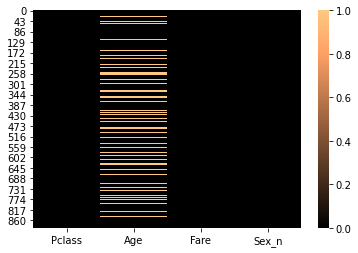

In [28]:
sns.heatmap(m_inputs.isnull(),cmap='copper')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

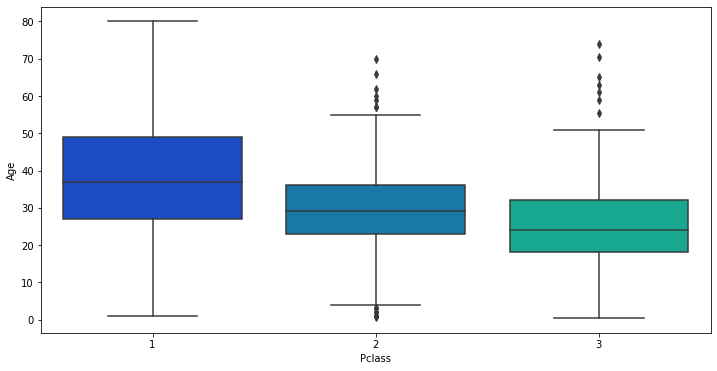

In [34]:
#fill Age with respect to age

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',data=m_inputs,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. 
We'll use these average age values to impute based on Pclass for Age.e can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [36]:
def input_age(lis):
    Age=lis[0]
    Pclass=lis[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 23
    else:
        return Age
        

In [40]:
#applying above fun anf fill the age

m_inputs['Age']=m_inputs[['Age','Pclass']].apply(input_age,axis=1)

In [41]:
m_inputs

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,23.0,23.4500,0
889,1,26.0,30.0000,1


<AxesSubplot:>

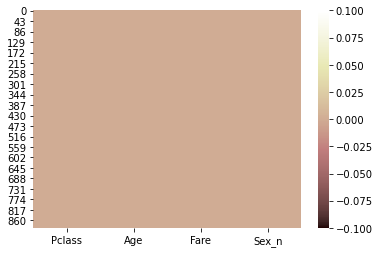

In [47]:
sns.heatmap(m_inputs.isnull(),cmap="pink")

In [48]:
#import model and train 
from sklearn import tree

In [49]:
tr =tree.DecisionTreeClassifier()
tr

DecisionTreeClassifier()

In [50]:
tr.fit(m_inputs,target)

DecisionTreeClassifier()

In [57]:
tr.score(m_inputs,target)

0.978675645342312

In [56]:
tr.predict([[3,26.0,13.0000,1]])

array([0], dtype=int64)